**Loading the Participants File**

In [1]:
import pandas as pd

#Load the participants csv
participants_df = pd.read_csv("participantss.csv")

#display the first few rows
print(participants_df.head())

  participant_id  Gender   Age  Group   MMSE  
0         sub-001       F    57      A      16
1         sub-002       F    78      A      22
2         sub-003       M    70      A      14
3         sub-004       F    67      A      20
4         sub-005       M    70      A      22


In [2]:
participants_df.columns = participants_df.columns.str.strip()
print(participants_df.columns)

Index(['participant_id', 'Gender', 'Age', 'Group', 'MMSE'], dtype='object')


**loading the dataset**

In [3]:
import mne
import os

eeg_dir = "data/"

#List all the EEG files in the directory
eeg_files= [f for f in os.listdir(eeg_dir) if f.endswith(".set")]

eeg_data_dict = {}

#iterate through all the file and load EEG data
for file in eeg_files:
    subject_id = file.split("_")[0]

    #match subject id with the corresponding dignosis (group)
    #diagnosis = participants_df.loc[participants_df['participant_id'] == subject_id, 'Group'].values[0]
    diagnosis = participants_df.loc[participants_df['participant_id'] == subject_id, 'Group'].values[0]
    
    #Load the eeg data using mne with preload set to true
    eeg_data = mne.io.read_raw_eeglab(os.path.join(eeg_dir, file), preload=True) 

    #Store the eeg data and the corresponding diagnosis
    eeg_data_dict[subject_id] = {"eeg_data": eeg_data, "diagnosis": diagnosis}

#Check the strucrure of the dictionary
print(eeg_data_dict)

C:\Users\felix\AppData\Local\Temp\ipykernel_18884\1997942485.py:20: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  eeg_data = mne.io.read_raw_eeglab(os.path.join(eeg_dir, file), preload=True)
C:\Users\felix\AppData\Local\Temp\ipykernel_18884\1997942485.py:20: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  eeg_data = mne.io.read_raw_eeglab(os.path.join(eeg_dir, file), preload=True)
C:\Users\felix\AppData\Local\Temp\ipykernel_18884\1997942485.py:20: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  eeg_data = mne.io.read_raw_eeglab(os.path.join(eeg_dir, file), preload=True)
C:\Users\felix\AppData\Local\Temp\ipykernel_18884\1997942485.py:20: RuntimeWarning: The data contains 'boundary' events, ind

{'sub-001': {'eeg_data': <RawEEGLAB | sub-001_task-eyesclosed_eeg.set, 19 x 299900 (599.8 s), ~43.5 MiB, data loaded>, 'diagnosis': 'A'}, 'sub-002': {'eeg_data': <RawEEGLAB | sub-002_task-eyesclosed_eeg.set, 19 x 396550 (793.1 s), ~57.5 MiB, data loaded>, 'diagnosis': 'A'}, 'sub-003': {'eeg_data': <RawEEGLAB | sub-003_task-eyesclosed_eeg.set, 19 x 153050 (306.1 s), ~22.2 MiB, data loaded>, 'diagnosis': 'A'}, 'sub-004': {'eeg_data': <RawEEGLAB | sub-004_task-eyesclosed_eeg.set, 19 x 353050 (706.1 s), ~51.2 MiB, data loaded>, 'diagnosis': 'A'}, 'sub-005': {'eeg_data': <RawEEGLAB | sub-005_task-eyesclosed_eeg.set, 19 x 402050 (804.1 s), ~58.3 MiB, data loaded>, 'diagnosis': 'A'}, 'sub-006': {'eeg_data': <RawEEGLAB | sub-006_task-eyesclosed_eeg.set, 19 x 316200 (632.4 s), ~45.9 MiB, data loaded>, 'diagnosis': 'A'}, 'sub-007': {'eeg_data': <RawEEGLAB | sub-007_task-eyesclosed_eeg.set, 19 x 383210 (766.4 s), ~55.6 MiB, data loaded>, 'diagnosis': 'A'}, 'sub-008': {'eeg_data': <RawEEGLAB | sub

**PRE-PROCESSING**

In [4]:
#Applying  bandpass filtering(0.5-45 hz)
eeg_data_filtered = eeg_data.filter(l_freq=0.5, h_freq=45)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


**Removing boundary Events**

In [5]:
#Removing boundary events(discontinuities)
# Check the events in the dataset
events, event_id = mne.events_from_annotations(eeg_data)

# Print out the events to see the types
print("Original events:")
print(events)

Used Annotations descriptions: [np.str_('boundary')]
Original events:
[[  6800      0      1]
 [ 84840      0      1]
 [186510      0      1]
 [327790      0      1]
 [345650      0      1]
 [390540      0      1]]


In [6]:
# Remove boundary events
boundary_event_id = event_id.get('boundary')
if boundary_event_id is not None:
    events_before = events.copy()  # Save original events for comparison
    events = events[events[:, 2] != boundary_event_id]
    
    print(f"Number of events before removing boundary events: {len(events_before)}")
    print(f"Number of events after removing boundary events: {len(events)}")
    
    # Optionally, print a sample of the first few events to confirm the change
    print("First few events after boundary event removal:")
    print(events[:10])  # Print first 10 events for inspection
else:
    print("No boundary events found.")


Number of events before removing boundary events: 6
Number of events after removing boundary events: 0
First few events after boundary event removal:
[]


In [7]:
#Epoching the data
#defining the duration of each epoch(like 4 seconds)
epochs = mne.make_fixed_length_epochs(eeg_data_filtered, duration=4, preload=True)

Not setting metadata
196 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 196 events and 2000 original time points ...
0 bad epochs dropped


**Feature Extraction**

Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).


C:\Users\felix\OneDrive\PM BM\EEG\venv\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


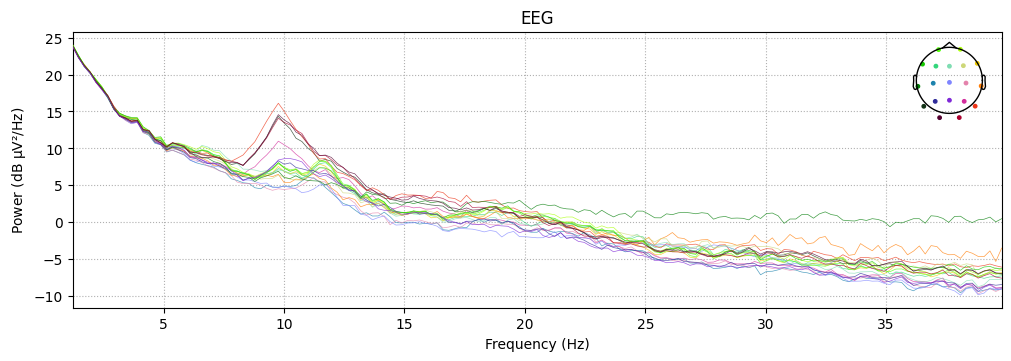

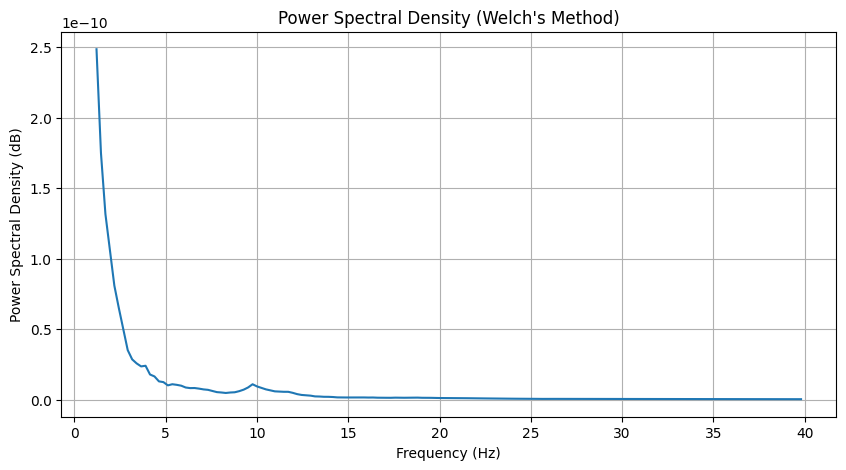

In [8]:
#Feature extraction
import matplotlib.pyplot as plt
psd = eeg_data_filtered.compute_psd(method='welch', fmin=1, fmax=40)
#psd = epochs.compute_psd(method='welch', fmin=1, fmax=40)

#Acces the psd values and frequencies
psd_values = psd.get_data() #psd values (n_channels x n_frequencies)
freqs = psd.freqs #Frequencies corresponding to the psd values

psd.plot()
#plot the psd
plt.figure(figsize=(10, 5))
plt.plot(freqs, psd_values.mean(axis=0))  # Mean across channels
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density (dB)")
plt.title("Power Spectral Density (Welch's Method)")
plt.grid(True)
plt.show()

**Prepairing Data for training**

In [9]:
#Prepairing data for training
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

In [10]:
# Reshape the EEG dataset into CNN-compatible format
X = []
y = []

# Define label mapping for binary classification (A = 0, C = 1)
label_mapping = {'A': 0, 'C': 1}  # Only Alzheimer's (A) and Healthy (C)

for subject_id, data in eeg_data_dict.items():
    psd_values = psd_values #Extracted psd features(n_channels, n_frequencies)
    diagnosis = label_mapping[data['diagnosis']] #convert diagnosis to label

    X.append(psd_values)
    y.append(diagnosis)

In [11]:
#Converrt lists to numpy arrays
X = np.array(X) #shape (samples, channels, frequencies)
y = np.array(y) #shape (samples)

print(f"Feature matrix shape: {X.shape}")  
print(f"Labels shape: {y.shape}")

Feature matrix shape: (88, 19, 159)
Labels shape: (88,)


In [12]:
#Standardize the features
scaler = StandardScaler()
X_reshaped = X.reshape(X.shape[0], -1)  #Flatten for noramlization
X_reshaped = scaler.fit_transform(X_reshaped)

#reshape back for CNN input(samples, frequencies, channels)
X = X_reshaped.reshape(X.shape[0], X.shape[2], X.shape[1])

In [13]:
y = np.array(y)

#Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

**Data Augmentation**

In [14]:
# Data augmentation function
def augment_eeg_data(eeg_data, noise_factor=0.01):
    """
    Add random noise to the EEG data for augmentation.
    """
    noise = noise_factor * np.random.normal(size=eeg_data.shape)
    return eeg_data + noise

# Apply augmentation to your dataset
X_train_augmented = np.array([augment_eeg_data(x) for x in X_train])

# Combine original and augmented data
X_train_combined = np.concatenate([X_train, X_train_augmented])
y_train_combined = np.concatenate([y_train, y_train])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train_combined, y_train_combined, test_size=0.2, stratify=y_train_combined, random_state=42
)

**Model Definition**

In [16]:
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.layers import Input

# Define the model
model = models.Sequential([
    Input(shape=(X_train_combined.shape[1], X_train_combined.shape[2], 1)),  # Shape based on your data
    layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # For binary classification: 2 units
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)             ┃ Output Shape      ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d (Conv2D)          │ (None, 159, 19,   │         80 │
│                          │ 8)                │            │
├──────────────────────────┼───────────────────┼────────────┤
│ max_pooling2d            │ (None, 79, 9, 8)  │          0 │
│ (MaxPooling2D)           │                   │            │
├──────────────────────────┼───────────────────┼────────────┤
│ dropout (Dropout)        │ (None, 79, 9, 8)  │          0 │
├──────────────────────────┼───────────────────┼────────────┤
│ flatten (Flatten)        │ (None, 5688)      │          0 │
├──────────────────────────┼───────────────────┼────────────┤
│ dense (Dense)            │ (None, 32)        │    182,048 │
├──────────────────────────┼───────────────────┼────────────┤
│ dropout_1 (Dropout)      │ (None, 32)        │          0 │
├──────────────────────────┼───────────────────┼────────────┤
│ dense_1 (Dense)          │ (None, 1)         │         33 │
└──────────────────────────┴───────────────────┴────────────┘

 Total params: 182,161 (711.57 KB)

 Trainable params: 182,161 (711.57 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
#Compile the model
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
               loss='binary_crossentropy', #since it is a multiclass classification problem
               metrics=['accuracy'])

**Computing class Weights**

In [18]:
#Compute class weights
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_combined), y=y_train_combined)
class_weights = dict(enumerate(class_weights))

print("Class Weights:", class_weights)

Class Weights: {0: np.float64(0.7446808510638298), 1: np.float64(1.5217391304347827)}


**Training**

In [24]:
#Implementing early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping])
history = model.fit(
    X_train_combined, y_train_combined,
    epochs=200,
    batch_size=32,
    validation_data=(X_test, y_test),
    #callbacks=[early_stopping],
    class_weight=class_weights  # Add class weights here
)

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.6912 - loss: 0.7008 - val_accuracy: 0.6786 - val_loss: 0.6831
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6687 - loss: 0.7095 - val_accuracy: 0.6786 - val_loss: 0.6835
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6585 - loss: 0.7080 - val_accuracy: 0.6786 - val_loss: 0.6860
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6385 - loss: 0.7037 - val_accuracy: 0.6786 - val_loss: 0.6872
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6843 - loss: 0.7083 - val_accuracy: 0.7500 - val_loss: 0.6879
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.7093 - loss: 0.6892 - val_accuracy: 0.6786 - val_loss: 0.6864
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6830 - loss: 0.6878 - val_accuracy: 0.6786 - val_loss: 0.6857
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.7205 - loss: 0.6951 - val_accuracy: 0.6786 - val_loss:

**Evaluation**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


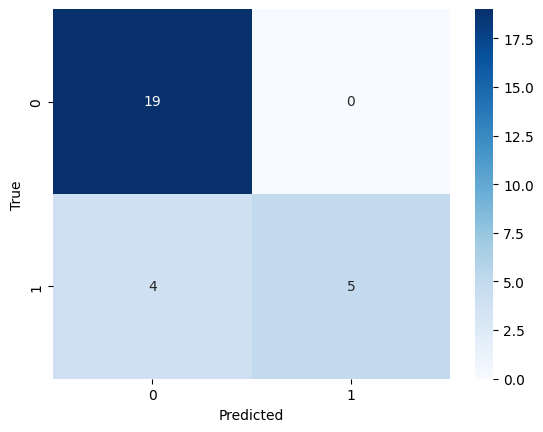

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int) 
y_true_classes = y_test

cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [26]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.8571 - loss: 0.6787
Test Loss: 0.6787108182907104
Test Accuracy: 0.8571428656578064


In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_true_classes, y_pred_classes))


              precision    recall  f1-score   support

           0       0.83      1.00      0.90        19
           1       1.00      0.56      0.71         9

    accuracy                           0.86        28
   macro avg       0.91      0.78      0.81        28
weighted avg       0.88      0.86      0.84        28



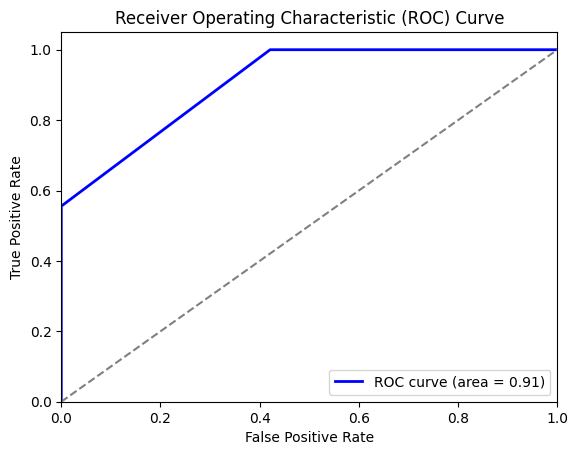

In [28]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_true_classes, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [29]:
model.save('eeg_model.h5')  # Save the model


In [30]:
model.save('eeg_model.keras')  # Save the model
